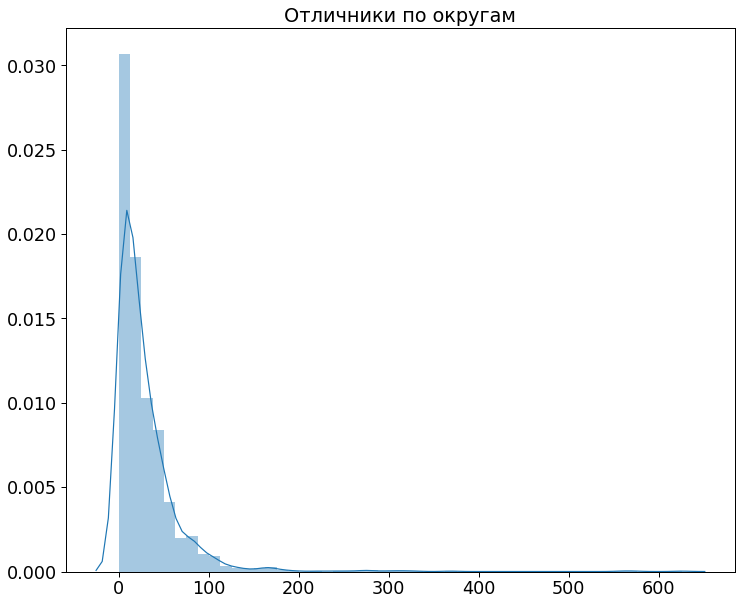

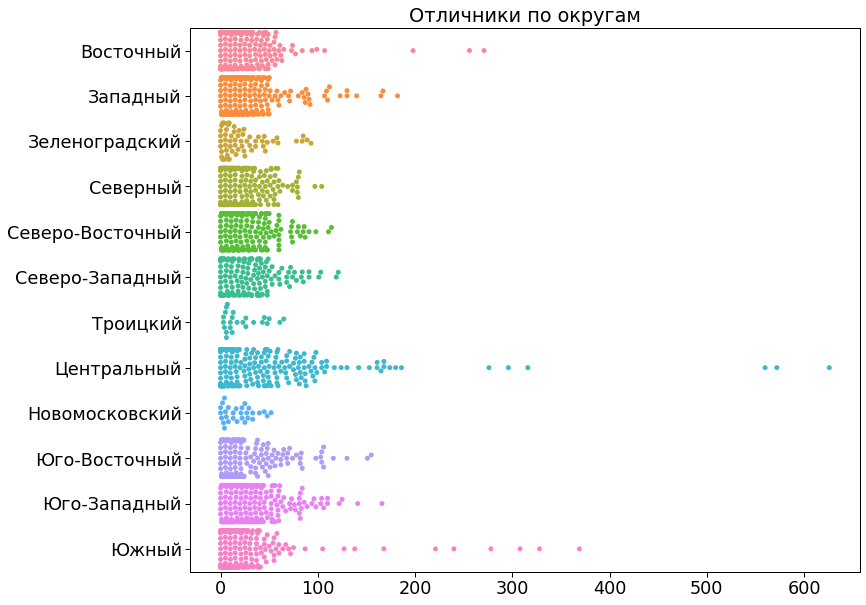

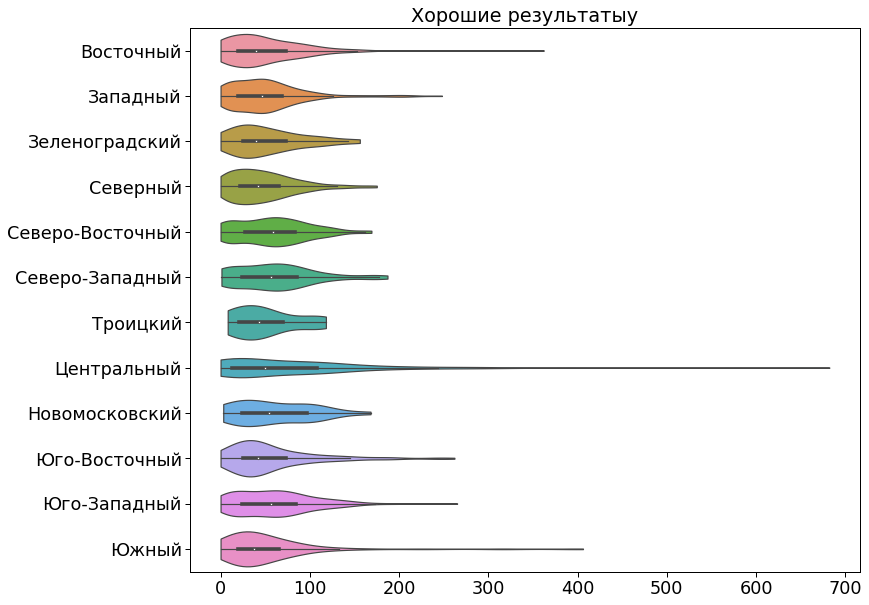

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#задать размеры холста без непосредственно его создания
from matplotlib import rcParams 

#увеличение шрифта по умолчанию
rcParams['figure.figsize'] = 12,10 
sns.set_context("paper", font_scale=2)

data = pd.read_csv("http://digo.ee/data-9722.utf.csv", delimiter=";")

# для округа Москвы сраязу оставим только первое слово
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])

#построение базового графика по всем результатам
sns.distplot(data["PASSES_OVER_220"]).set(xlabel='', ylabel='', title='Отличники по округам')

plt.show()

#График улей по округам Москвы
sns.swarmplot(x="PASSES_OVER_220", y="AdmArea", data=data).set(xlabel='', ylabel='', title='Отличники по округам')
plt.show()

#График скрипка по округам Москвы
sns.violinplot(x="PASSER_UNDER_160", y="AdmArea", data=data, cut=0)
plt.xlabel('')
plt.ylabel('')
plt.title('Хорошие результатыу')
plt.show()

#print (data.head())

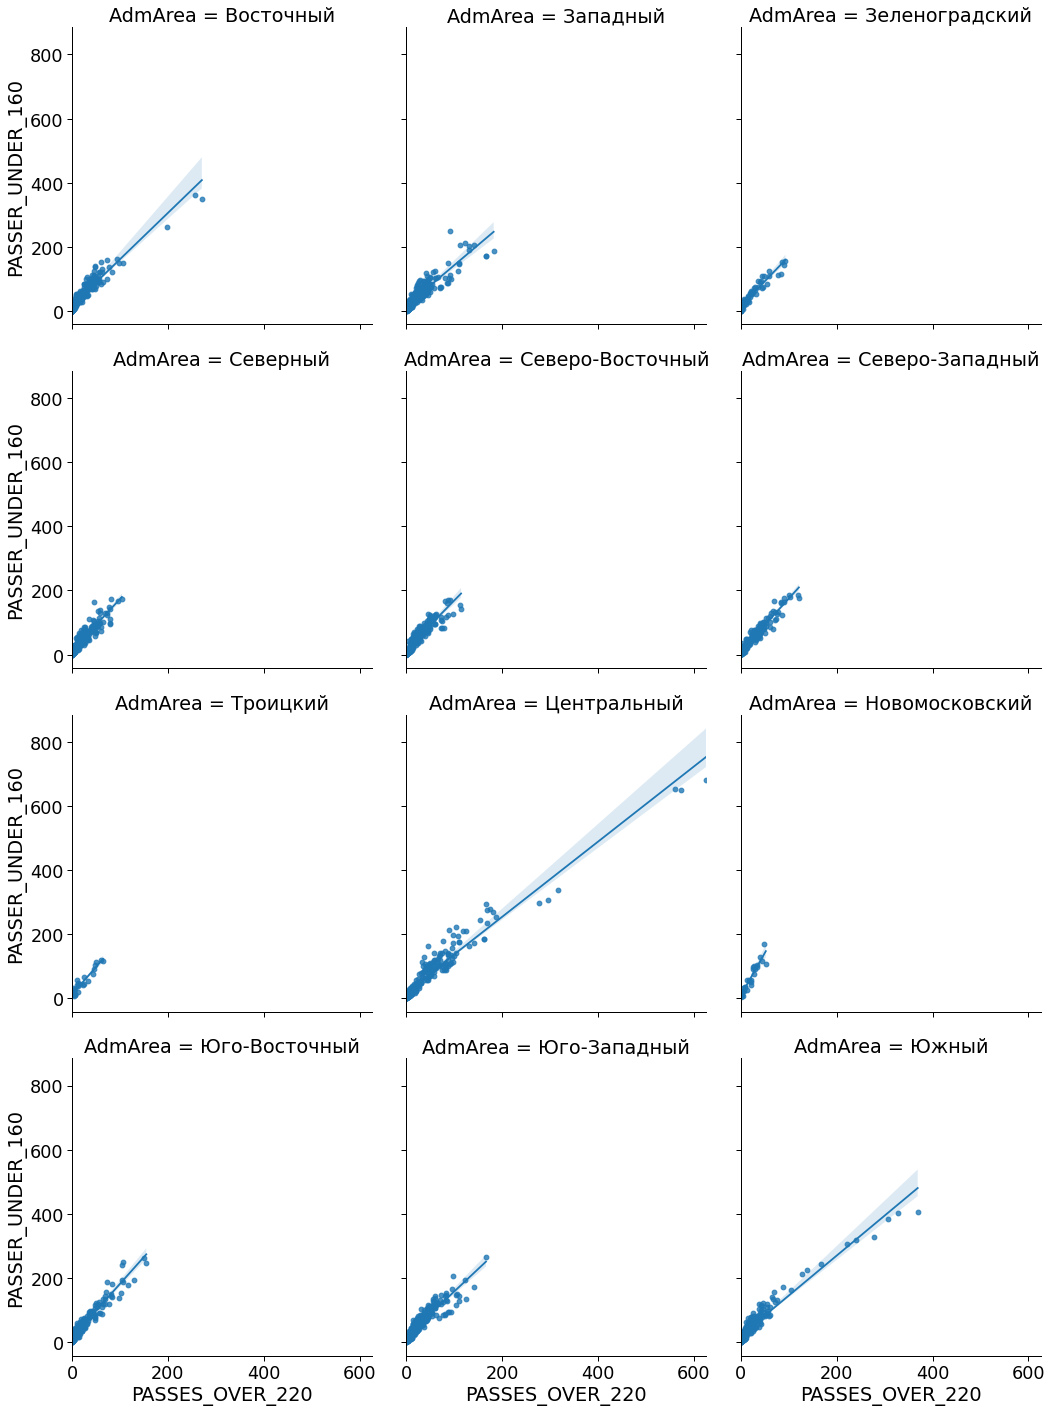

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#размеры холста
rcParams['figure.figsize'] = 12,12
#увеличенный размер шрифта
sns.set_context('paper', font_scale=2)

data = pd.read_csv("http://digo.ee/data-9722.utf.csv", delimiter=";")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])
data["District"] = data["District"].str.replace("район ", "")
data["EDU_NAME_TITLE"] = data["EDU_NAME"].apply(lambda x:x.split(" ")[-1].replace(">>", ""))
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data, col="AdmArea", col_wrap=3, truncate=True)
plt.show()
#print (data.head())

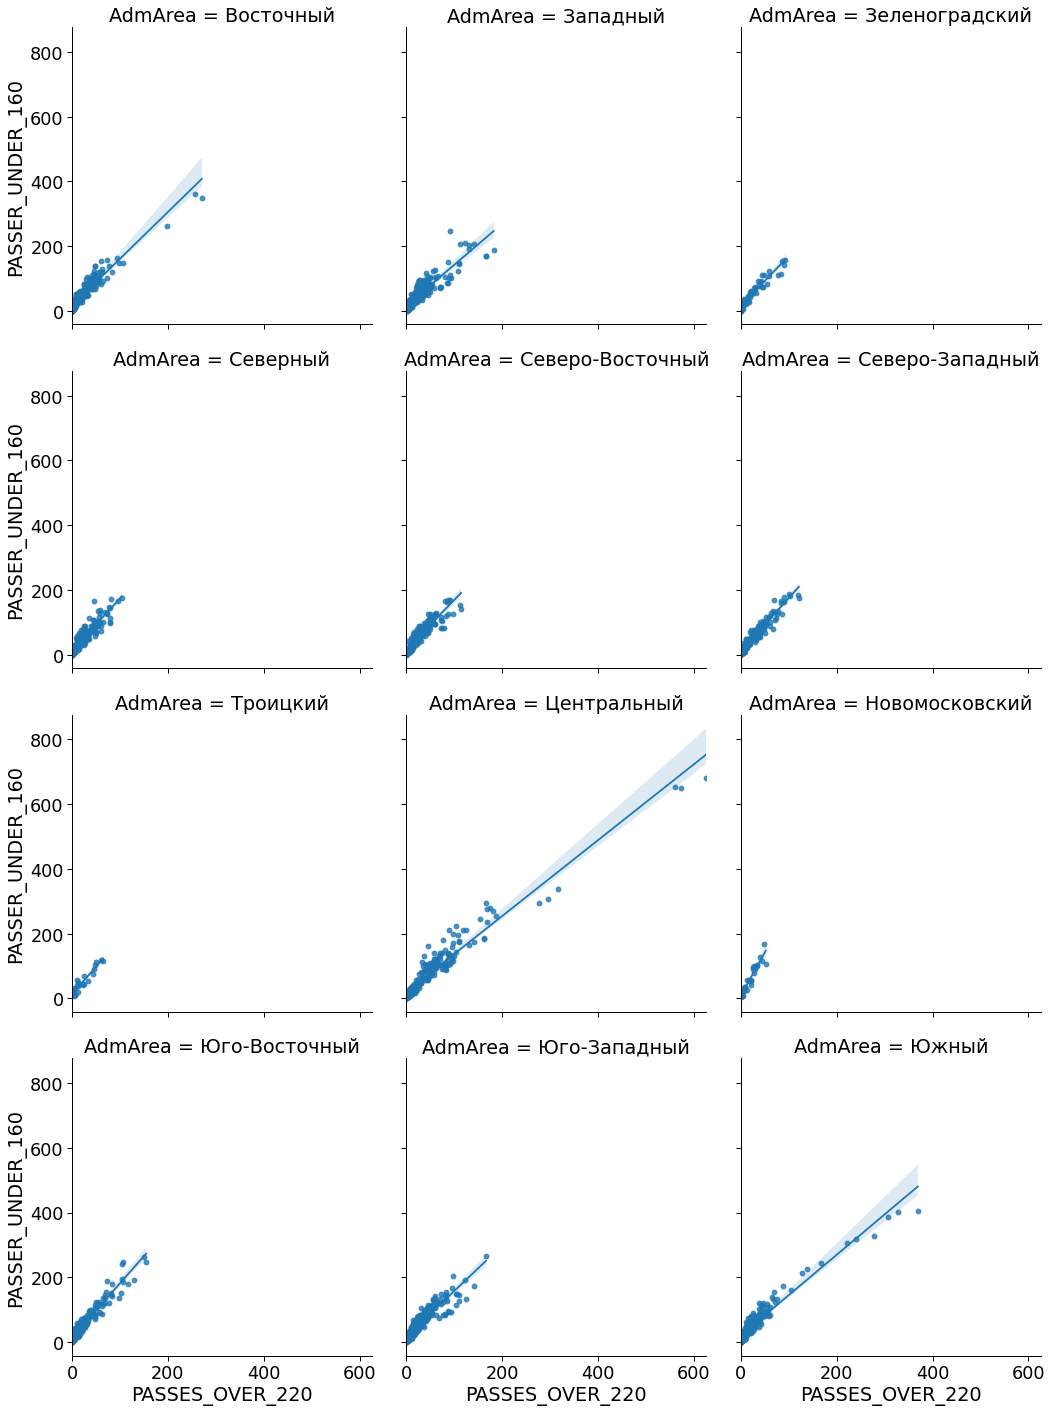

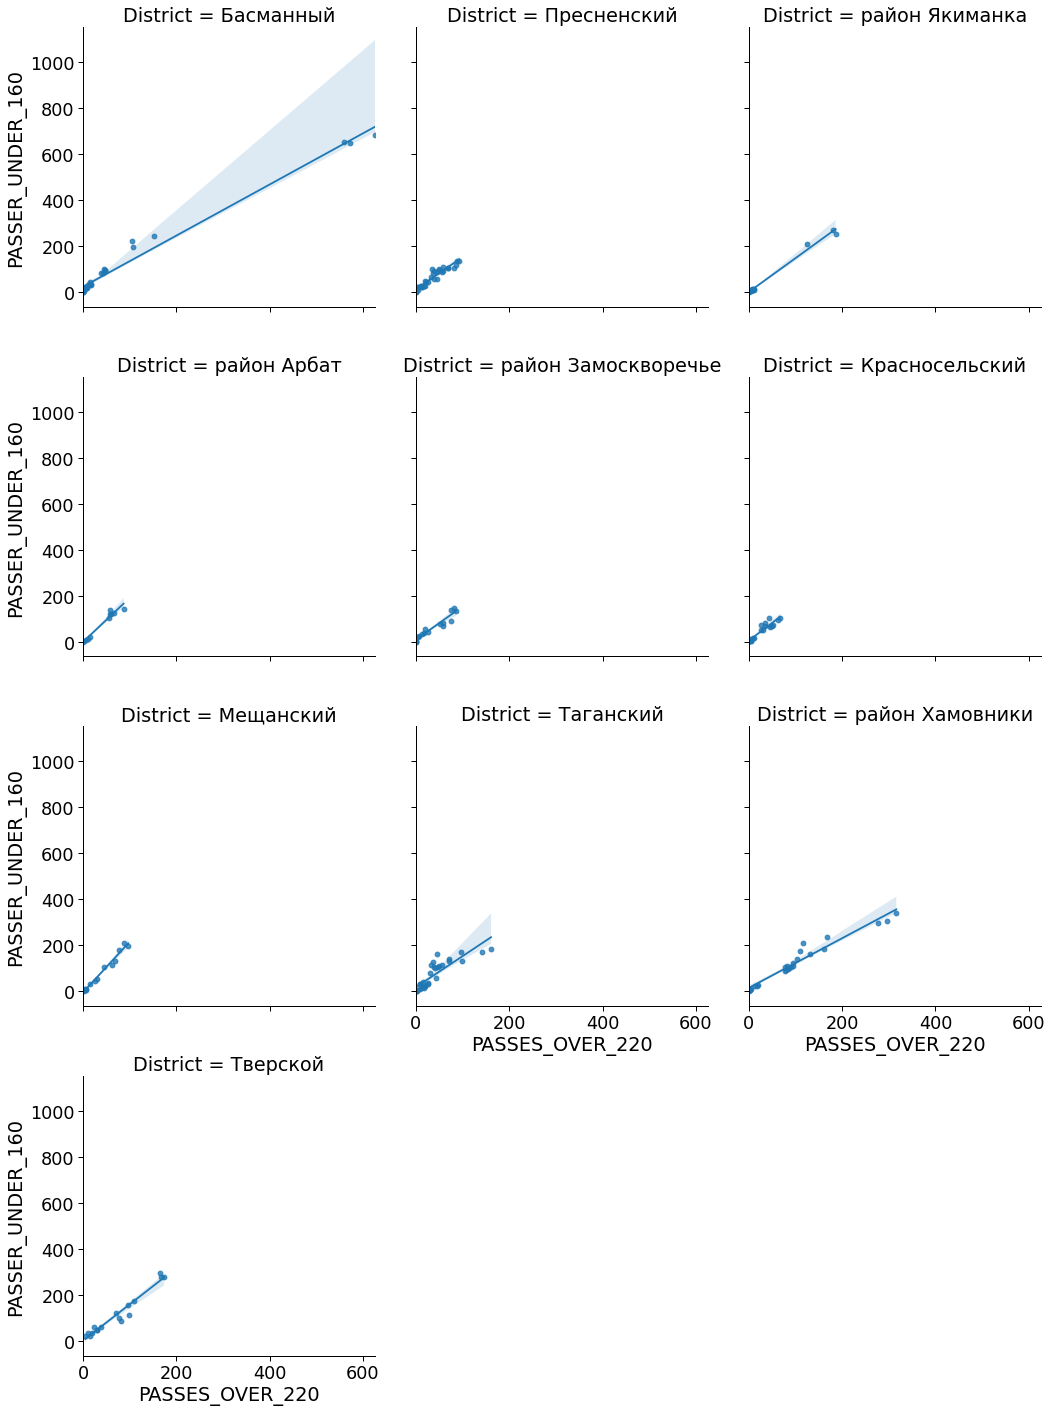

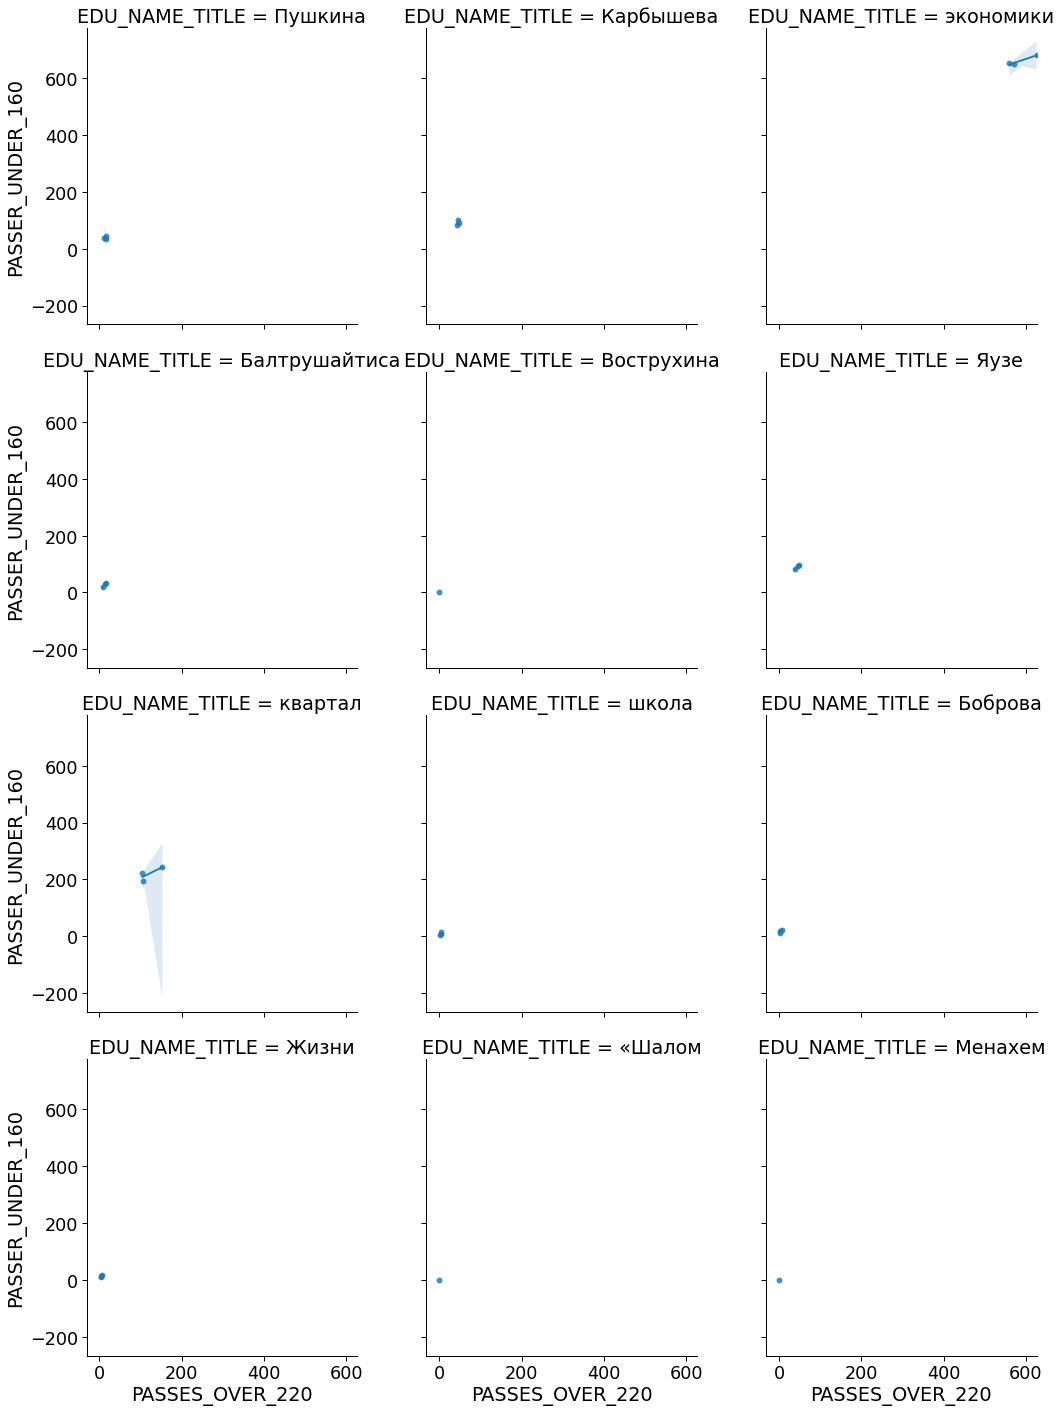

EDU_NAME_TITLE
экономики               Федеральное государственное автономное образовательное учреждение высшего «Национальный исследовательский университет «Высшая школа экономики». лицей «Национального исследовательского университета «Высшая школа экономики»
экономики                                                                Федеральное государственное автономное образовательное учреждение высшего профессионального образования «Национальный исследовательский университет «Высшая школа экономики»
экономики    Федеральное государственное автономное образовательное учреждение высшего образования «Национальный исследовательский университет» Высшая школа экономики». лицей Национального исследовательского университета» Высшая школа экономики»
Name: EDU_NAME, dtype: object


In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#размеры холста 12х12
rcParams['figure.figsize'] = 12,12
#увеличенный размер шрифта
sns.set_context('paper', font_scale=2)

data = pd.read_csv("http://digo.ee/data-9722.utf.csv", delimiter=";")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0])
data["District"] = data["District"].str.replace(" район", "")
data["EDU_NAME_TITLE"] = data["EDU_NAME"].apply(lambda x:x.split(" ")[-1].replace("»",""))
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data, col="AdmArea", col_wrap=3, truncate=True)

data1 = data.set_index("AdmArea").loc["Центральный"]
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data1, col="District", col_wrap=3, truncate=True)
plt.show()

data2 = data1.set_index("District").loc["Басманный"]
sns.lmplot(x="PASSES_OVER_220", y="PASSER_UNDER_160", data=data2, col="EDU_NAME_TITLE", col_wrap=3, truncate=True)
plt.show()
pd.options.display.max_colwidth = 1000
print (data2.set_index('EDU_NAME_TITLE').loc["экономики"]["EDU_NAME"])